###Setup

In [2]:
# Import packages
import pandas as pd
import seaborn as sns

# Fix visualization style
sns.set()

In [3]:
# Define folder with data
data_path = './Data/'

# Load data
data_train = pd.read_csv(data_path + 'train.csv')
data_test = pd.read_csv(data_path + 'test.csv')

###Initial EDA

In [4]:
data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


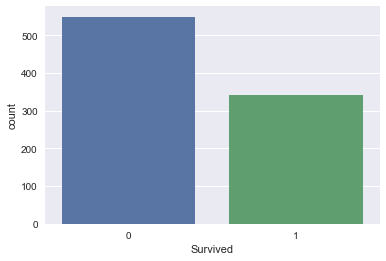

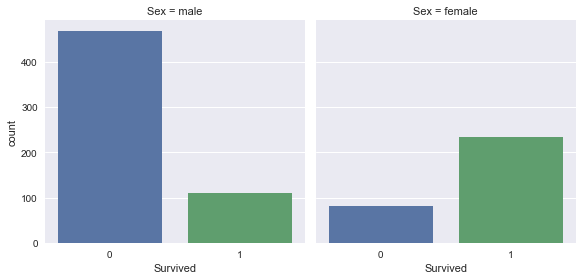

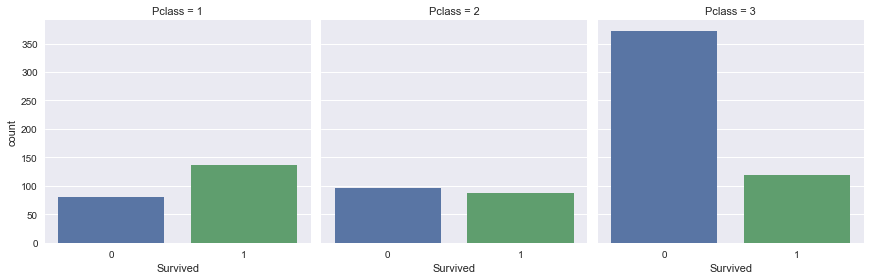

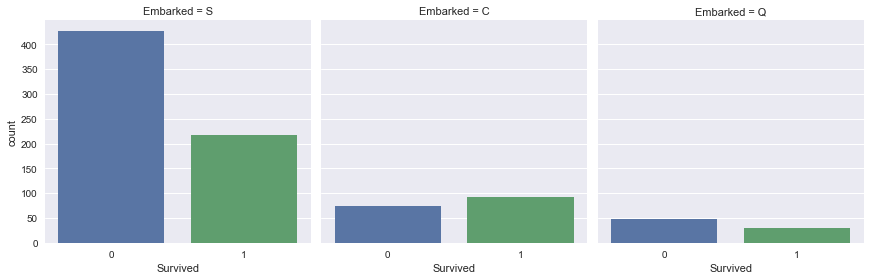

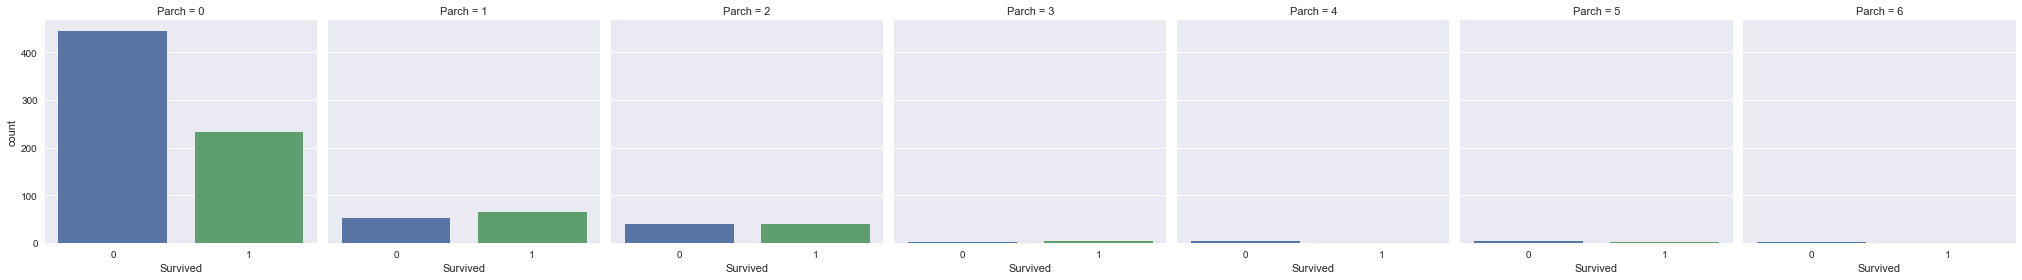

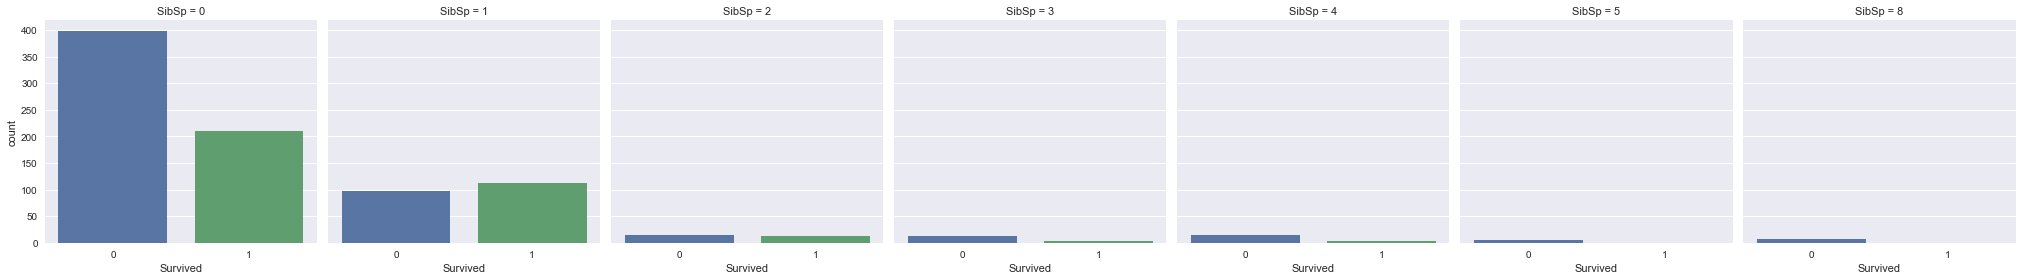

In [6]:
sns.countplot(x='Survived', 
              data=data_train)

sns.factorplot(x='Survived',
               col='Sex',
               kind='count',
               data=data_train)

sns.factorplot(x='Survived',
               col='Pclass',
               kind='count',
               data=data_train)

sns.factorplot(x='Survived',
               col='Embarked',
               kind='count',
               data=data_train)

sns.factorplot(x='Survived',
               col='Parch',
               kind='count',
               data=data_train)

sns.factorplot(x='Survived',
               col='SibSp',
               kind='count',
               data=data_train)

###Build models

In [7]:
data_train_features = data_train.drop(['Survived'], axis=1)
data_all = pd.concat([data_train_features, data_test])

In [8]:
# Define transformation function
def transform_data(my_data):
    # List of all initial columns
    ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
    
    # Parameters
    dummy_columns = ['Pclass', 'Sex', 'Embarked']
    to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    
    # Transform 'Age' (missing values)
    my_data['Age'] = my_data['Age'].fillna(value=-1)

    # Transform 'Fare' (missing values)
    my_data['Fare'] = my_data['Fare'].fillna(value=-1)

    # Transform categorical variables into dummy columns
    for column_name in dummy_columns:
        dummies = pd.get_dummies(my_data[column_name], prefix=column_name)
        my_data = pd.concat([my_data, dummies], axis=1)
    
    # Drop unused columns
    my_data = my_data.drop(dummy_columns, axis=1)    
    my_data = my_data.drop(to_drop, axis=1)  
        
    return my_data

In [9]:
# Transform data
data_all_transformed = transform_data(data_all)

labels = data_train['Survived']
features = data_all_transformed[0:891]
holdout = data_all_transformed[891:]

In [10]:
def score_model(my_clf, my_features, my_labels):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(my_clf, my_features, my_labels, cv=10)
    return scores.mean()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = SVC()
clf4 = GaussianNB()

print(score_model(clf1, features, labels))
print(score_model(clf2, features, labels))
print(score_model(clf3, features, labels))
print(score_model(clf4, features, labels))

0.8048652252865736
0.7912186471456134
0.7263369651571898
0.7801827261377824


In [12]:
# Build final model
final_clf = RandomForestClassifier()
final_clf.fit(features, labels)

# Make final predictions
holdout_predictions = final_clf.predict(holdout)

# Create submission data frame
holdout_ids = data_test['PassengerId']
submission_df = {'PassengerId': holdout_ids,
                 'Survived': holdout_predictions}
submission = pd.DataFrame(submission_df)

# Export submission as timestamped csv
from datetime import datetime
submission_name = 'submission_' + datetime.now().strftime('%Y%m%d_%H%M') + '.csv'
submission.to_csv(submission_name, index=False)

### Old solutions

In [346]:
### Single model

# Split training data
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.20)

# Train the model
from sklearn.ensemble import RandomForestClassifier
single_clf = RandomForestClassifier()

single_clf.fit(train_X, train_y)
predictions = single_clf.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8324022346368715


In [354]:
### Single k-fold cross validation

# Import clissifiers
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
scores = cross_val_score(clf, features, labels, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.74157303 0.74444444 0.76404494 0.78651685 0.78888889 0.79775281
 0.82022472 0.85393258 0.86516854 0.875     ]
0.8037546816479401
